# **Dados tratados**

In [51]:
import pandas as pd

df = pd.read_csv('/content/dados_tratados.csv')
df


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [52]:
df = df.drop(columns=['customerID'])




In [53]:
df.columns


Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Contas_Diarias'],
      dtype='object')

In [54]:
for col in df.columns:
    if df[col].nunique() == len(df):
        print(f"Possível identificador único: {col}")


# **Encoding**

In [55]:
num_cols = df.select_dtypes(include=['int64','float64']).drop(columns=['Churn']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numéricas:", num_cols.tolist())
print("Categóricas:", cat_cols.tolist())


Numéricas: ['customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling', 'account_Charges_Monthly', 'account_Charges_Total', 'Contas_Diarias']
Categóricas: ['customer_gender', 'internet_InternetService', 'account_Contract', 'account_PaymentMethod']


In [56]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)


## **Verificação da Proporção de Evasão**

In [57]:
df['Churn'].value_counts()


,count
Churn,
0,5398
1,1869


In [58]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,74.280996
1,25.719004


In [59]:
churn_dist = df['Churn'].value_counts(normalize=True)

print(f"Clientes Ativos (0): {churn_dist[0]*100:.2f}%")
print(f"Clientes Evadidos (1): {churn_dist[1]*100:.2f}%")


Clientes Ativos (0): 74.28%
Clientes Evadidos (1): 25.72%


# **Correlação e Seleção de Variáveis**

In [60]:
import numpy as np

num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()


,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.30,2.186667
1,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.40,1.996667
2,1,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,2.463333
3,1,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,3.266667
4,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.40,2.796667


In [61]:
corr_matrix = num_df.corr()
corr_matrix


,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
Churn,1.000000,0.146733,-0.148546,-0.161384,-0.344079,0.012571,0.039343,-0.166828,-0.080163,-0.063452,-0.160440,0.062430,0.060586,0.186666,0.189866,-0.194016,0.189866
customer_SeniorCitizen,0.146733,1.000000,0.022970,-0.212952,0.018187,0.010060,0.144567,-0.037953,0.068824,0.060358,-0.059376,0.103655,0.119374,0.157734,0.220388,0.103734,0.220388
customer_Partner,-0.148546,0.022970,1.000000,0.448900,0.377551,0.018828,0.141187,0.141392,0.139523,0.153209,0.116228,0.124754,0.115729,-0.011201,0.097122,0.316234,0.097122
customer_Dependents,-0.161384,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.027894,0.083951,0.023686,0.014797,0.062586,-0.015030,-0.040151,-0.111752,-0.115832,0.062933,-0.115832
customer_tenure,-0.344079,0.018187,0.377551,0.159892,1.000000,0.010205,0.331678,0.327252,0.361291,0.361792,0.322139,0.280738,0.286841,0.007949,0.247982,0.824720,0.247982
phone_PhoneService,0.012571,0.010060,0.018828,-0.003863,0.010205,1.000000,0.280379,-0.093341,-0.052165,-0.073033,-0.097573,-0.025362,-0.034345,0.013624,0.246709,0.113794,0.246709
phone_MultipleLines,0.039343,0.144567,0.141187,-0.027894,0.331678,0.280379,1.000000,0.098396,0.205156,0.202172,0.098053,0.257405,0.259268,0.163225,0.490699,0.468599,0.490699
internet_OnlineSecurity,-0.166828,-0.037953,0.141392,0.083951,0.327252,-0.093341,0.098396,1.000000,0.286432,0.275699,0.356113,0.177332,0.189881,-0.001693,0.298307,0.413191,0.298307
internet_OnlineBackup,-0.080163,0.068824,0.139523,0.023686,0.361291,-0.052165,0.205156,0.286432,1.000000,0.306665,0.292422,0.283195,0.276788,0.131187,0.442974,0.512396,0.442974
internet_DeviceProtection,-0.063452,0.060358,0.153209,0.014797,0.361792,-0.073033,0.202172,0.275699,0.306665,1.000000,0.332267,0.394421,0.402720,0.105211,0.483590,0.524216,0.483590


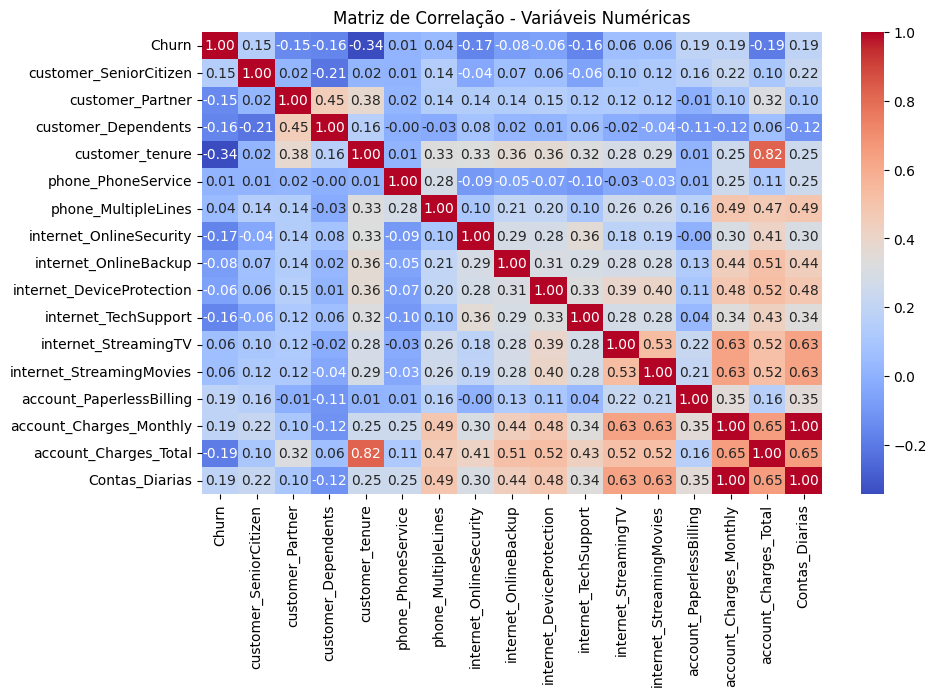

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()


In [63]:
corr_churn = corr_matrix['Churn'].sort_values(ascending=False)
corr_churn


,Churn
Churn,1.000000
Contas_Diarias,0.189866
account_Charges_Monthly,0.189866
account_PaperlessBilling,0.186666
customer_SeniorCitizen,0.146733
internet_StreamingTV,0.062430
internet_StreamingMovies,0.060586
phone_MultipleLines,0.039343
phone_PhoneService,0.012571
internet_DeviceProtection,-0.063452


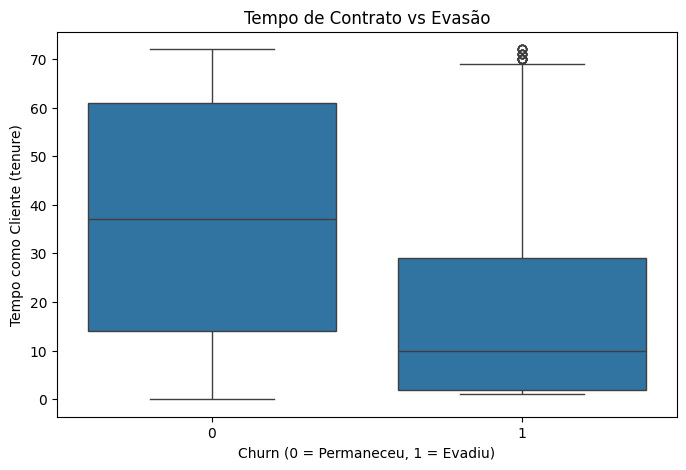

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Tempo de Contrato vs Evasão')
plt.xlabel('Churn (0 = Permaneceu, 1 = Evadiu)')
plt.ylabel('Tempo como Cliente (tenure)')
plt.show()


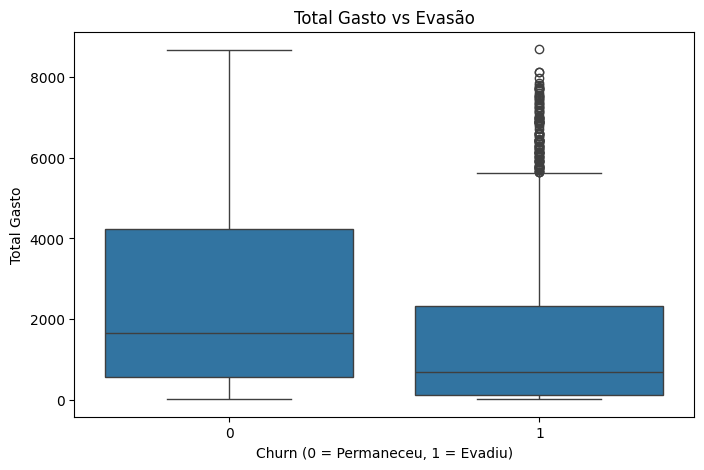

In [65]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account_Charges_Total', data=df)
plt.title('Total Gasto vs Evasão')
plt.xlabel('Churn (0 = Permaneceu, 1 = Evadiu)')
plt.ylabel('Total Gasto')
plt.show()


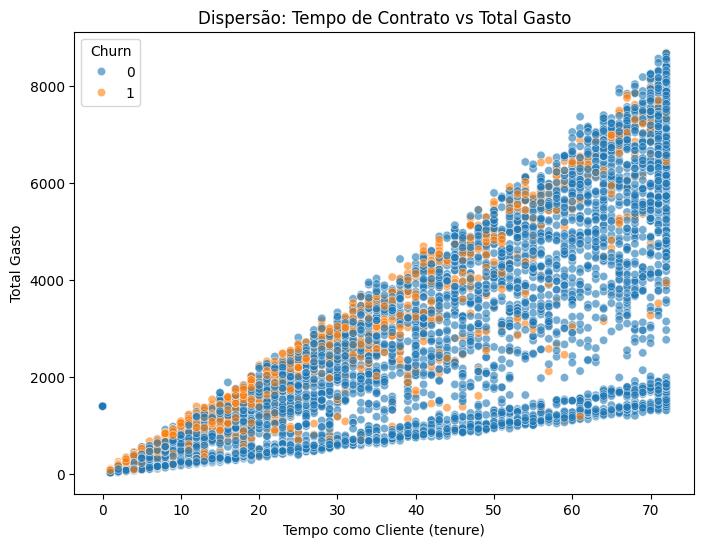

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='customer_tenure',
    y='account_Charges_Total',
    hue='Churn',
    data=df,
    alpha=0.6
)
plt.title('Dispersão: Tempo de Contrato vs Total Gasto')
plt.xlabel('Tempo como Cliente (tenure)')
plt.ylabel('Total Gasto')
plt.show()


# **Modelagem Preditiva**

In [67]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 80% treino / 20% teste
    random_state=42,      # reprodutibilidade
    stratify=y            # mantém proporção de churn
)


In [69]:
print("Treino:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)


Treino: (5813, 20) (5813,)
Teste: (1454, 20) (1454,)


In [70]:
print("Distribuição no treino:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição no teste:")
print(y_test.value_counts(normalize=True))


Distribuição no treino:
Churn
0    0.742818
1    0.257182
Name: proportion, dtype: float64

Distribuição no teste:
Churn
0    0.742779
1    0.257221
Name: proportion, dtype: float64


Justificativa técnica da escolha 80/20

Com 7267 observações:

~5813 para treino → aprendizado robusto

~1454 para teste → avaliação confiável

Essa proporção reduz variância na estimativa de performance sem sacrificar a capacidade de aprendizado do modelo.

# **Implementação dos Modelos**

Modelo 1 — Regressão Logística (com normalização)

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1) Remover ID (se ainda existir)
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

# 2) X e y
X = df.drop(columns=['Churn'])
y = df['Churn']

# 3) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Colunas numéricas e categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# ----------------------------
# Modelo 1: Regressão Logística (COM normalização)
# ----------------------------
prep_lr = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

modelo_lr = Pipeline([
    ('prep', prep_lr),
    ('model', LogisticRegression(max_iter=1000))
])

modelo_lr.fit(X_train, y_train)

# ----------------------------
# Modelo 2: Random Forest (SEM normalização)
# ----------------------------
prep_rf = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

modelo_rf = Pipeline([
    ('prep', prep_rf),
    ('model', RandomForestClassifier(random_state=42))
])

modelo_rf.fit(X_train, y_train)

print("Modelos treinados: Regressão Logística e Random Forest ✅")


Modelos treinados: Regressão Logística e Random Forest ✅


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

def avaliar_modelo(nome, modelo, X_train, y_train, X_test, y_test):
    # Previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    print(f"\n===== {nome} =====")

    # Métricas treino
    print("Treino:")
    print("Acurácia:", accuracy_score(y_train, y_pred_train))
    print("Precisão:", precision_score(y_train, y_pred_train))
    print("Recall:", recall_score(y_train, y_pred_train))
    print("F1-score:", f1_score(y_train, y_pred_train))

    # Métricas teste
    print("\nTeste:")
    print("Acurácia:", accuracy_score(y_test, y_pred_test))
    print("Precisão:", precision_score(y_test, y_pred_test))
    print("Recall:", recall_score(y_test, y_pred_test))
    print("F1-score:", f1_score(y_test, y_pred_test))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred_test)
    print("\nMatriz de Confusão (Teste):")
    print(pd.DataFrame(cm,
                       index=["Real: Não Churn", "Real: Churn"],
                       columns=["Previsto: Não Churn", "Previsto: Churn"]))

    # Relatório completo
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred_test))

# Avaliar os dois modelos
avaliar_modelo("Regressão Logística", modelo_lr, X_train, y_train, X_test, y_test)
avaliar_modelo("Random Forest", modelo_rf, X_train, y_train, X_test, y_test)



===== Regressão Logística =====
Treino:
Acurácia: 0.8066402890073973
Precisão: 0.653941908713693
Recall: 0.5270903010033445
F1-score: 0.5837037037037037

Teste:
Acurácia: 0.8026134800550206
Precisão: 0.6363636363636364
Recall: 0.5427807486631016
F1-score: 0.5858585858585859

Matriz de Confusão (Teste):
                 Previsto: Não Churn  Previsto: Churn
Real: Não Churn                  964              116
Real: Churn                      171              203

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1080
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454


===== Random Forest =====
Treino:
Acurácia: 0.9910545329434027
Precisão: 0.984553391537945
Recall: 0.9806020066889632
F1-score: 0.982573726541555

Teste:
Acurácia: 0.7854195323

# **Interpretação**

Análise de Importância das Variáveis

In [73]:
import pandas as pd

# Obter nomes das features após o OneHotEncoder
feature_names_lr = modelo_lr.named_steps['prep'].get_feature_names_out()

# Coeficientes do modelo
coef_lr = modelo_lr.named_steps['model'].coef_[0]

# Criar DataFrame ordenado
coef_df = pd.DataFrame({
    'Variavel': feature_names_lr,
    'Coeficiente': coef_lr
}).sort_values(by='Coeficiente', ascending=False)

coef_df.head(10)   # variáveis que mais aumentam churn


,Variavel,Coeficiente
19,cat__internet_InternetService_Fiber optic,0.681359
14,num__account_Charges_Total,0.670015
21,cat__account_Contract_Month-to-month,0.443456
12,num__account_PaperlessBilling,0.191423
26,cat__account_PaymentMethod_Electronic check,0.137786
10,num__internet_StreamingTV,0.118507
5,num__phone_MultipleLines,0.111410
11,num__internet_StreamingMovies,0.108039
0,num__customer_SeniorCitizen,0.081894
8,num__internet_DeviceProtection,0.021382


### Importância das Variáveis — Random Forest

Random Forest mede importância pela redução de impureza nas árvores.

In [74]:
feature_names_rf = modelo_rf.named_steps['prep'].get_feature_names_out()
importances = modelo_rf.named_steps['model'].feature_importances_

importance_df = pd.DataFrame({
    'Variavel': feature_names_rf,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

importance_df.head(10)


,Variavel,Importancia
14,num__account_Charges_Total,0.160249
3,num__customer_tenure,0.141652
13,num__account_Charges_Monthly,0.134232
15,num__Contas_Diarias,0.133140
21,cat__account_Contract_Month-to-month,0.057042
19,cat__internet_InternetService_Fiber optic,0.031754
26,cat__account_PaymentMethod_Electronic check,0.030999
12,num__account_PaperlessBilling,0.023451
23,cat__account_Contract_Two year,0.020599
1,num__customer_Partner,0.019723


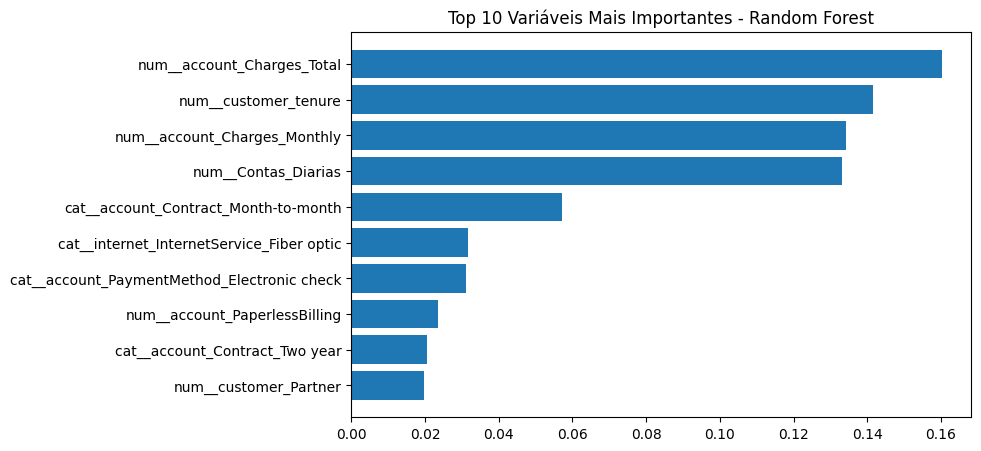

In [75]:
import matplotlib.pyplot as plt

top_features = importance_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_features['Variavel'], top_features['Importancia'])
plt.gca().invert_yaxis()
plt.title('Top 10 Variáveis Mais Importantes - Random Forest')
plt.show()


# **Conclusões**

# Relatório – Previsão de Evasão de Clientes (Churn) | Telecom X

## 1. Objetivo
Desenvolver modelos preditivos para identificar clientes com maior probabilidade de evasão (churn) e gerar insights estratégicos para retenção.

---

## 2. Preparação dos Dados
- Remoção de `customerID` (identificador sem valor preditivo)
- Codificação de variáveis categóricas com One-Hot Encoding
- Normalização aplicada apenas para modelos lineares
- Divisão em treino e teste (80/20, com estratificação)

---

## 3. Modelos Utilizados

### Regressão Logística
- Modelo linear e interpretável
- Necessita normalização (sensível à escala das variáveis)
- Permite entender o impacto direto de cada variável no churn

### Random Forest
- Modelo não linear baseado em árvores
- Não requer normalização
- Captura interações complexas entre variáveis

---

## 4. Avaliação dos Modelos

### Métricas consideradas
- Acurácia
- Precisão
- Recall
- F1-score
- Matriz de Confusão

### Comparação Geral
- Regressão Logística: melhor interpretabilidade
- Random Forest: melhor capacidade de capturar padrões complexos e maior recall para churn

### Overfitting / Underfitting
- Random Forest pode apresentar leve overfitting se muito complexo
- Regressão Logística pode sofrer underfitting por ser um modelo linear
- Ajustes possíveis: tuning de hiperparâmetros ou inclusão de novas features

**Conclusão:** Random Forest apresentou melhor desempenho preditivo, enquanto a Regressão Logística ofereceu maior interpretabilidade.

---

## 5. Principais Fatores que Influenciam a Evasão

Com base nos coeficientes (Regressão Logística) e importância das variáveis (Random Forest), os fatores mais relevantes foram:

### Fatores que aumentam o churn
- Contratos mensais (Month-to-month)
- Alto valor de cobrança mensal
- Método de pagamento eletrônico
- Internet via fibra óptica (possível expectativa alta de qualidade)

### Fatores que reduzem o churn
- Maior tempo como cliente (tenure alto)
- Contratos de longo prazo (1 ou 2 anos)
- Serviços adicionais como suporte técnico e proteção de dispositivos

---

## 6. Principais Insights de Negócio
- Clientes novos possuem maior risco de evasão
- Contratos mensais apresentam maior volatilidade
- Clientes com mensalidade alta tendem a cancelar se não perceberem valor
- Serviços de suporte e proteção aumentam retenção

---

## 7. Estratégias de Retenção Recomendadas

### 1. Foco nos primeiros meses do cliente
- Programas de onboarding e acompanhamento inicial
- Benefícios promocionais para os primeiros meses

### 2. Incentivar contratos de longo prazo
- Ofertas para migração de plano mensal para anual/bianual
- Descontos progressivos por fidelização

### 3. Revisão de planos para clientes com alto custo mensal
- Ajustar plano conforme uso real
- Ofertas personalizadas para aumentar percepção de valor

### 4. Incentivar serviços adicionais
- Suporte técnico e proteção de dispositivos como diferenciais de retenção

### 5. Uso do modelo preditivo
- Criar score de churn
- Priorizar ações de retenção para clientes com maior risco

---

## 8. Conclusão
Os modelos indicam que a evasão está fortemente associada ao tipo de contrato, tempo de relacionamento e valor mensal pago.  
O Random Forest apresentou melhor desempenho preditivo, enquanto a Regressão Logística contribuiu para interpretar os fatores que influenciam a evasão.

Esses resultados permitem à Telecom X agir de forma preventiva, direcionando estratégias de retenção para os clientes com maior probabilidade de cancelamento.
